# **Modeling and Evaluation**

## Objectives

* Answering Business requirement #2:
* - Predict whether a leaf is infected with powdery mildew or not

## Inputs

* inputs/dataset/cherry-leaves/cherry-leaves/test
* inputs/dataset/cherry-leaves/cherry-leaves/train
* inputs/dataset/cherry-leaves/cherry-leaves/validation

## Outputs

* Generate images distribution for the train, test, and validation sets
* Image augmentation
* Class indicies to change prediction inference in labels
* Create and train Machine Learning Model
* Save the model
* Learning curve plot to show model performance
* Model evaluation on pickle file
* Create a prediction using a random imag file
  

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 



---

## Import packages ##

In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from matplotlib.image import imread

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/mildew-detection/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'/workspaces/mildew-detection'

---

### Set input directories ###

Set train, validation and test paths

In [6]:
my_data_dir = "inputs/datasets/cherry-leaves/cherry-leaves"
train_path = my_data_dir + "/train"
val_path = my_data_dir + "/validation"
test_path = my_data_dir + "/test"

### Set Output Directory ###

In [ ]:
version = "version1"
file_path = f"outputs/{version}"
if "outputs" in os.listdir(current_dir) and version in os.listdir(current_dir + "/outputs"):
    print("Old version is already available. Create a new version.")
    pass
else:
    os.makedirs(name=file_path)

### Set labels ###

In [9]:
labels = os.listdir(train_path)
print(f"The Project Labels are {labels}")

The Project Labels are ['powdery_mildew', 'healthy']


### Set Image Shape ###

In [12]:
import joblib
version = "version1"
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pk1")
image_shape

(160, 160, 3)

---

### Number of images in train, test and validation data ###

Count the number of images for each set and label

In [26]:
data = {
    "Set": [],
    "Label": [],
    "Frequency": []
}
folders = ["train", "validation", "test"]
for folder in folders:
    for label in labels:
        row = {
            "Set": folder,
            "Label": label,
            "Frequency": int(len(os.listdir(my_data_dir + "/" + folder + "/" + label)))
        }
        for key, value in row.items():
            data[key].append(value)
        print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+"/"+ folder + "/" + label))} images")
df_freq = pd.DataFrame(data)

* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* validation - powdery_mildew: 210 images
* validation - healthy: 210 images
* test - powdery_mildew: 422 images
* test - healthy: 422 images


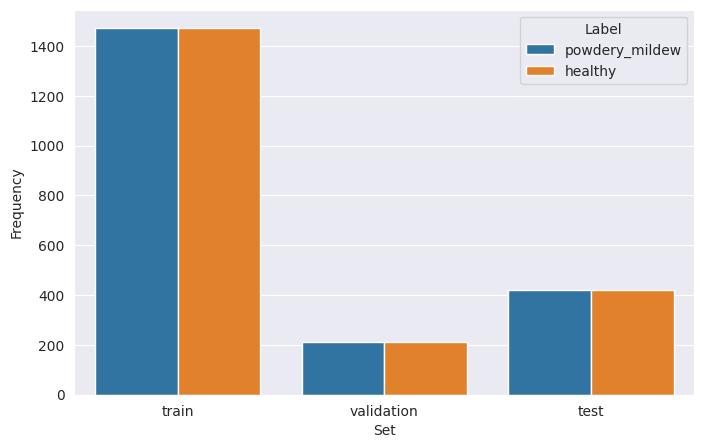

In [28]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x="Set", y="Frequency", hue="Label")
plt.savefig(f"{file_path}/labels_distribution.png", bbox_inches="tight",dpi=150)
plt.show()

---

## Image Data Augmentation ##

### Image Data Generator ###

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Initialise ImageDataGenerator ###

In [30]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode="nearest",
                                          rescale=1./255
                                          )

### Batch Size ###

In [33]:
batch_size = 20

### Augment training image dataset ###

In [ ]:
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode="rgb",
                                                     batch_size=batch_size,
                                                     class_mode="categorical",
                                                     shuffle=True)

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augment Validation Image Dataset ###

In [35]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                     target_size=image_shape[:2],
                                                     color_mode="rgb",
                                                     batch_size=batch_size,
                                                     class_mode="categorical",
                                                     shuffle=False)

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augument Test Image Dataset ###

In [36]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                     target_size=image_shape[:2],
                                                     color_mode="rgb",
                                                     batch_size=batch_size,
                                                     class_mode="categorical",
                                                     shuffle=False)

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot Augmented Training Image ###

(20, 160, 160, 3)


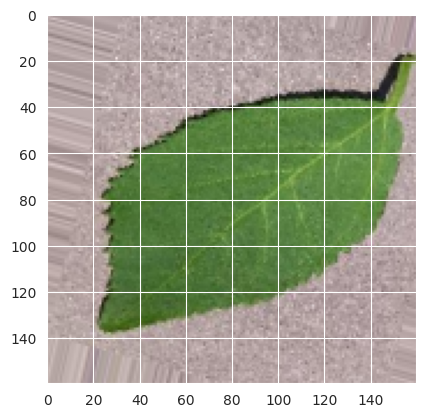

(20, 160, 160, 3)


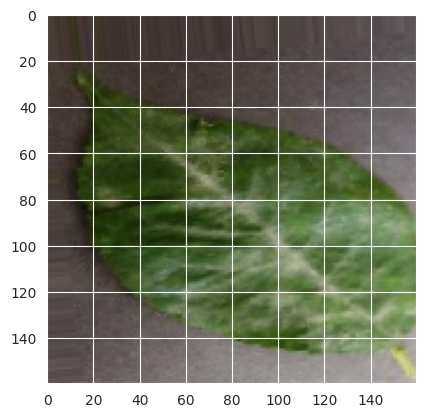

(20, 160, 160, 3)


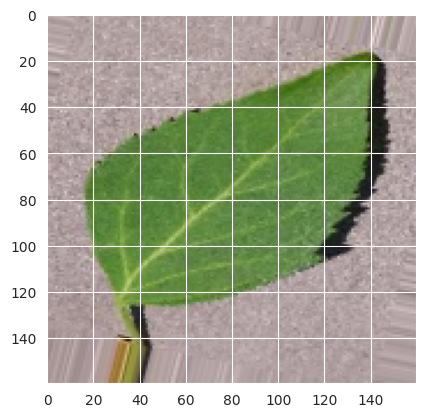

In [39]:
for _ in range(3):
    img, label = next(train_set)
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

### Plot Augmented Validation Images ###

(20, 160, 160, 3)


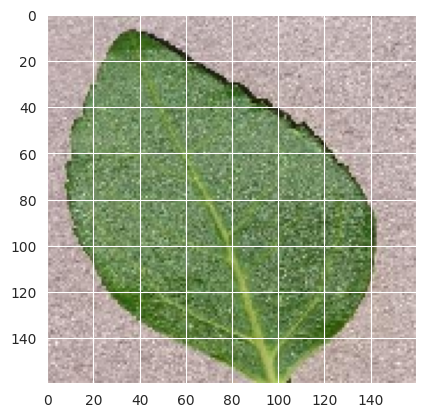

(20, 160, 160, 3)


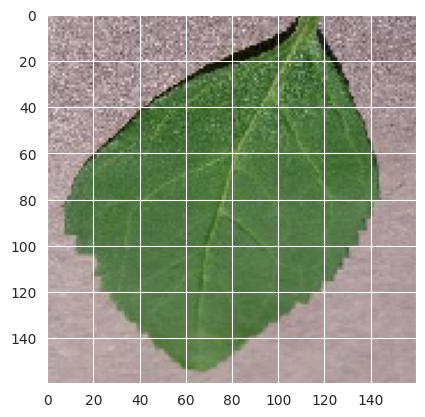

(20, 160, 160, 3)


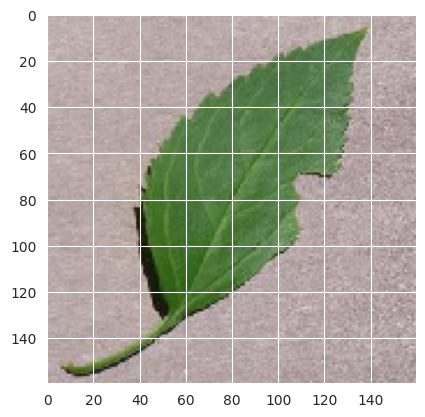

In [40]:
for _ in range(3):
    img, label = next(validation_set)
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

### Plot Augmented Test Images ###

(20, 160, 160, 3)


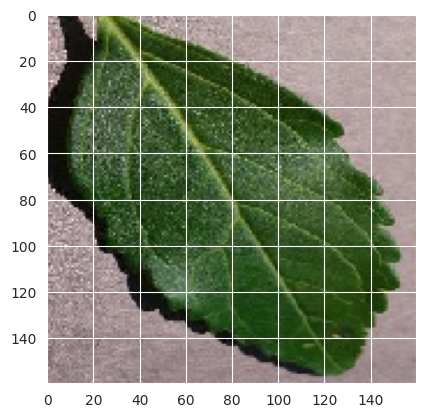

(20, 160, 160, 3)


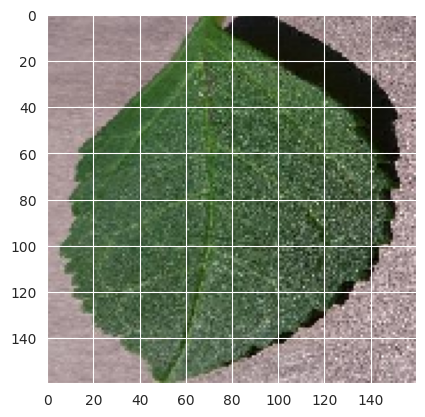

(20, 160, 160, 3)


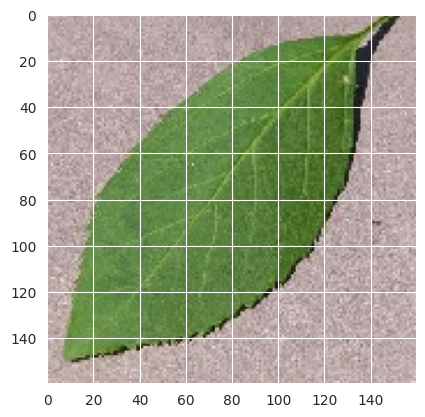

In [41]:
for _ in range(3):
    img, label = next(test_set)
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

### Save class_indices ###

In [42]:
joblib.dump(value=train_set.class_indices, filename=f"{file_path}/class_indicies.pk1")

['outputs/1/class_indicies.pk1']

---

## Model Creation ##

### Import Model Packages ##

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam, Adagrad

### Create Model ###

In [59]:
def create_tf_model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3),
                     input_shape=image_shape, activation="relu",))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3),
                     input_shape=image_shape, activation="relu",))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3),
                     input_shape=image_shape, activation="relu",))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation="softmax"))
    model.compile(loss="categorical_crossentropy",
                  optimizer="adagrad",
                  metrics=["accuracy"])
    return model

### Model Summary ###

In [60]:
create_tf_model().summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 158, 158, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 79, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 77, 77, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 36, 36, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │     1,327,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,383,618 (5.28 MB)

 Trainable params: 1,383,618 (5.28 MB)

 Non-trainable params: 0 (0.00 B)

### Early Stopping ###

In [61]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=3)

### Fit model for model training ###

In [62]:
model = create_tf_model()
model.fit(train_set,
          batch_size = batch_size,
          epochs=20,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data = validation_set,
          callbacks = [early_stop],
          verbose = 1
)

Epoch 1/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.5969 - loss: 0.6683

/home/cistudent/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


147/147 ━━━━━━━━━━━━━━━━━━━━ 50s 318ms/step - accuracy: 0.6713 - loss: 0.6217 - val_accuracy: 0.8500 - val_loss: 0.4833
Epoch 2/20
  1/147 ━━━━━━━━━━━━━━━━━━━━ 1:05 446ms/step - accuracy: 0.7500 - loss: 0.5071

/home/cistudent/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7500 - loss: 0.5071 - val_accuracy: 0.9119 - val_loss: 0.4622
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 76s 301ms/step - accuracy: 0.8205 - loss: 0.4176 - val_accuracy: 0.9095 - val_loss: 0.2782
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8000 - loss: 0.3515 - val_accuracy: 0.8976 - val_loss: 0.2900
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 44s 299ms/step - accuracy: 0.8567 - loss: 0.3370 - val_accuracy: 0.8667 - val_loss: 0.2827
Epoch 6/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8000 - loss: 0.5122 - val_accuracy: 0.8881 - val_loss: 0.2669
Epoch 7/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 81s 306ms/step - accuracy: 0.8714 - loss: 0.3022 - val_accuracy: 0.8429 - val_loss: 0.3010
Epoch 8/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9500 - loss: 0.2573 - val_accuracy: 0.8714 - val_loss: 0.2645
Epoch 9/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 46s 310ms/step - accuracy: 0.8711 - loss: 0.2949 - val_accurac

### Model Save ###

In [63]:
model.save("outputs/version1/mildew_detector_model.h5")

# Section 1

Section 1 content

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
